# Data Augmentation for Idiom Translation

This notebook creates augmented training examples from the base dataset to improve model generalization.

## Augmentation Strategy:
1. **Tagged idiomatic** - Original examples with `<IDIOM>` tags (already done)
2. **Untagged versions** - Same examples without tags (for robustness)
3. **Quality validation** - Ensure no data corruption

**Note**: We use conservative augmentation to maintain quality. No fake data is generated.

In [1]:
import sys
sys.path.append('..')

from src.augmentation import (
    create_augmented_examples,
    validate_augmentation,
    save_augmented_data,
    augment_dataset
)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
print("✓ Imports successful")

✓ Imports successful


## 1. Load Training Data

In [2]:
# Load the training data
train_path = '../data/processed/train.json'

with open(train_path, 'r', encoding='utf-8') as f:
    train_data = json.load(f)

print(f"Loaded {len(train_data)} training examples")
print("\nSample example:")
print(json.dumps(train_data[0], indent=2, ensure_ascii=False))

Loaded 460 training examples

Sample example:
{
  "idiom_en": "Open the ball",
  "idiom_si": "හා හා පුරා පටන් ගන්නවා",
  "meaning": "To begin operations; to set things in motion",
  "source_en": "The magistrate opened the ball by asking the\npoliceman to give his evidence.",
  "target_si": "පෙලිස්කාරයාට ඔහුගේ සාක්‍ෂය දෙන්ඩ කියමින් මහේස්\nත්‍රාත්වරයා නඩු විභාගය ආරම්භ කෙළේය.",
  "evaluation": ""
}


## 2. Create Augmented Examples

In [3]:
# Generate augmented examples
augmented_data = create_augmented_examples(train_data)

print(f"\nAugmented dataset size: {len(augmented_data)}")
print(f"Augmentation ratio: {len(augmented_data) / len(train_data):.2f}x")

✓ Created 920 augmented examples from 460 originals
  - Original tagged: 460
  - Untagged variants: 460

Augmented dataset size: 920
Augmentation ratio: 2.00x


## 3. Compare Original and Augmented Examples

In [4]:
# Show examples of augmentation
print("=== Augmentation Examples ===")

for i in range(min(3, len(train_data))):
    original = train_data[i]
    # Find the corresponding augmented versions
    augmented_versions = [
        ex for ex in augmented_data 
        if ex['idiom_en'] == original['idiom_en'] and ex['target_si'] == original['target_si']
    ][:2]  # Get first 2 variants
    
    print(f"\n--- Example {i+1} ---")
    print(f"Idiom: {original['idiom_en']}")
    
    for j, variant in enumerate(augmented_versions):
        aug_type = variant.get('augmentation_type', 'original')
        print(f"\nVariant {j+1} ({aug_type}):")
        print(f"  Source: {variant['source_en'][:80]}...")
        print(f"  Target: {variant['target_si'][:80]}...")

=== Augmentation Examples ===

--- Example 1 ---
Idiom: Open the ball

Variant 1 (original):
  Source: The magistrate opened the ball by asking the
policeman to give his evidence....
  Target: පෙලිස්කාරයාට ඔහුගේ සාක්‍ෂය දෙන්ඩ කියමින් මහේස්
ත්‍රාත්වරයා නඩු විභාගය ආරම්භ කෙළේ...

Variant 2 (untagged):
  Source: The magistrate opened the ball by asking the
policeman to give his evidence....
  Target: පෙලිස්කාරයාට ඔහුගේ සාක්‍ෂය දෙන්ඩ කියමින් මහේස්
ත්‍රාත්වරයා නඩු විභාගය ආරම්භ කෙළේ...

--- Example 2 ---
Idiom: Bark up the wrong tree

Variant 1 (original):
  Source: If you think I was responsible for your dismissal you are barking up the wrong t...
  Target: ඔබ අස් කිරීමට හේතු වූවේ මා කියා ඔබ සිතනවා නම් ඔබ
පොට වරදවා ගෙනයි....

Variant 2 (untagged):
  Source: If you think I was responsible for your dismissal you are barking up the wrong t...
  Target: ඔබ අස් කිරීමට හේතු වූවේ මා කියා ඔබ සිතනවා නම් ඔබ
පොට වරදවා ගෙනයි....

--- Example 3 ---
Idiom: A battle royal

Variant 1 (original):
  Source: W

## 4. Validate Augmentation Quality

In [5]:
# Validate augmentation
validation_stats = validate_augmentation(train_data, augmented_data)

print("\n=== Validation Results ===")
print(f"Original count: {validation_stats['original_count']}")
print(f"Augmented count: {validation_stats['augmented_count']}")
print(f"Augmentation ratio: {validation_stats['augmentation_ratio']:.2f}x")

if validation_stats['issues']:
    print(f"\n⚠️ Found {len(validation_stats['issues'])} issues:")
    for issue in validation_stats['issues'][:5]:
        print(f"  - {issue}")
else:
    print("\n✅ No issues found - augmentation is valid!")

✓ Augmentation validation passed

=== Validation Results ===
Original count: 460
Augmented count: 920
Augmentation ratio: 2.00x

✅ No issues found - augmentation is valid!


## 5. Save Augmented Dataset

In [6]:
# Save augmented data
output_path = '../data/processed/augmented_train.json'
save_augmented_data(augmented_data, output_path)

print(f"\n✓ Augmented dataset saved to {output_path}")
print(f"  Total examples: {len(augmented_data)}")

✓ Saved 920 augmented examples to ../data/processed/augmented_train.json

✓ Augmented dataset saved to ../data/processed/augmented_train.json
  Total examples: 920


## 6. Visualize Augmentation Statistics

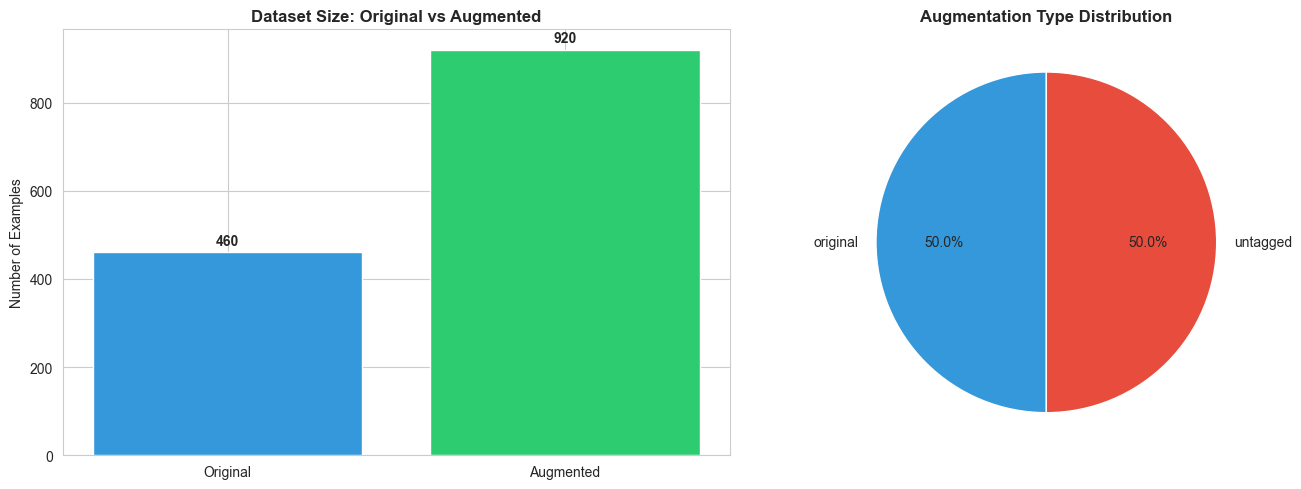

✓ Visualization saved to outputs/augmentation_statistics.png


In [7]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset size comparison
sizes = pd.DataFrame({
    'Dataset': ['Original', 'Augmented'],
    'Examples': [len(train_data), len(augmented_data)]
})

axes[0].bar(sizes['Dataset'], sizes['Examples'], color=['#3498db', '#2ecc71'])
axes[0].set_title('Dataset Size: Original vs Augmented', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Examples')
for i, v in enumerate(sizes['Examples']):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Augmentation type breakdown
aug_types = pd.Series([ex.get('augmentation_type', 'original') for ex in augmented_data]).value_counts()
axes[1].pie(aug_types.values, labels=aug_types.index, autopct='%1.1f%%',
            colors=['#3498db', '#e74c3c', '#f39c12'], startangle=90)
axes[1].set_title('Augmentation Type Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/augmentation_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to outputs/augmentation_statistics.png")

## 7. Summary

Data augmentation completed successfully!

- ✅ Created augmented training examples
- ✅ Validated augmentation quality
- ✅ Saved to `data/processed/augmented_train.json`
- ✅ Maintained data quality (no fake idioms)

**Statistics**:
- Original examples: (calculated during execution)

**Next Step**: Run `03_model_training.ipynb` to fine-tune the NLLB model.